In [1]:
!pip install qiskit
!pip install matplotlib
!pip install qiskit-aer
!pip install pylatexenc

Could not find platform independent libraries <prefix>


Could not find platform independent libraries <prefix>


Could not find platform independent libraries <prefix>


Could not find platform independent libraries <prefix>


In [5]:
# Import necessary components from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np # For pi
import matplotlib.pyplot as plt # Import Matplotlib for displaying figures

# --- Protocol Parameters (for a single coordinate pair for demonstration) ---
x_i = 5             # Example value for x_i (held by Party A)
y_i = 2             # Example value for y_i (held by Party B)
D_mod = 10          # Modulus D_mod > 2M (where M is max possible |x_i - y_i|)
                    # Ensure D_mod is large enough for your data range.
r_trap_qubits = 2   # Number of trap qubits (as per protocol parameter 'r')
num_coordinates = 1 # We'll demonstrate for n=1 and explain extension

# Define the number of qubits needed:
# 1 data qubit for the phase encoding of (x_i - y_i)
# r_trap_qubits for authentication
num_data_qubits = 1
total_qubits = num_data_qubits + r_trap_qubits
# We need classical bits to store measurement results for the data qubit
# and potentially for verifying trap qubits.
num_classical_bits = num_data_qubits + r_trap_qubits


# --- Step 1: Initialize the Quantum Circuit ---
# Create a quantum circuit with total_qubits and num_classical_bits.
qc = QuantumCircuit(total_qubits, num_classical_bits)
print("Quantum Circuit Initialized (Data Qubit 0, Trap Qubits 1 to {}):".format(r_trap_qubits))
# Use Matplotlib to draw the circuit
fig = qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})
fig.savefig('initial circuit.png')
plt.show(fig)
plt.close()
print("-" * 60)

# --- Step 2: Phase Encoding by Party A ---
# Protocol Step: "A: Prepare logical |+> state, apply phase rotation R_z(2*pi*x_i/D_mod)."
# We assume the logical |+> state is implemented by applying Hadamard to |0>.
# The R_z gate applies a phase rotation.
data_qubit_idx = 0
qc.h(data_qubit_idx) # Prepare |+> state on the data qubit
print(f"Party A: Prepared |+> on Q{data_qubit_idx} and applied Rz({2*np.pi*x_i/D_mod:.2f} rad) for x_i={x_i}:")
qc.rz(2 * np.pi * x_i / D_mod, data_qubit_idx)
# Use Matplotlib to draw the circuit
fig2 = qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})
fig.savefig('Alice Phase Encoding.png')
plt.show(fig2)
plt.close()
print("-" * 60)

# --- Step 3: Attach Trap Qubits and Authenticate (Conceptual) ---
# Protocol Step: "A: Attach r trap qubits and authenticate. Send to computation server / TP(s)."
# For demonstration, we'll just initialize the trap qubits and add a comment.
# In a real scenario, these would be prepared in specific states, possibly entangled
# with checks, and their states verified later.
print(f"Party A: Attaching {r_trap_qubits} trap qubits and conceptual authentication setup:")
qc.barrier() # Optional: Separates logical blocks in the circuit diagram
for i in range(r_trap_qubits):
    # Example: Just initialize trap qubits (e.g., to |0> for simplicity here)
    # In a real trap code, they would be prepared in specific known states
    # or entangled for verification.
    trap_qubit_idx = num_data_qubits + i
    # qc.h(trap_qubit_idx) # Could apply H to put in superposition, etc., for a real trap
    print(f"  Trap Qubit {trap_qubit_idx} initialized (conceptual).")
# Use Matplotlib to draw the circuit
fig3 = qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})
fig3.savefig('Trap Qubit.png')
plt.show(fig3)
plt.close()
print("   (Note: Full trap-based authentication logic is complex and conceptualized here.)")
print("-" * 60)

# --- Step 4: Phase Encoding by Party B ---
# Protocol Step: "B: On receipt, apply R_z(-2*pi*y_i/D_mod) to same logical state."
print(f"Party B: Applied Rz({-2*np.pi*y_i/D_mod:.2f} rad) to Q{data_qubit_idx} for y_i={y_i}:")
qc.rz(-2 * np.pi * y_i / D_mod, data_qubit_idx)
# Use Matplotlib to draw the circuit
fig4 = qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})
fig4.savefig('Bob Phase Encoding.jpg')
plt.show(fig4)
plt.close()
print("-" * 60)

# --- Step 5: Server / TP(s) Perform Modular Subtraction (via Phase) ---
# Protocol Step: "Server / TP(s): Using authenticated states, perform: Modular subtraction..."
# After Party A and Party B's operations, the phase on data_qubit_idx
# now represents the difference: phi = 2*pi*(x_i - y_i) / D_mod.
# To extract this phase as an integer value (Delta_i), a Quantum Phase Estimation (QPE)
# or a similar phase-extraction circuit would typically be used.
# For this draft, we'll demonstrate measurement and then show the expected classical calculation.
print("Server / TP(s): Preparing to extract Delta_i (x_i - y_i) from phase:")
# Apply Hadamard again to rotate phase back to computational basis for measurement.
# This helps to get non-uniform measurement probabilities if the phase is not 0 or pi.
qc.h(data_qubit_idx)
# Use Matplotlib to draw the circuit
fig5 = qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})
fig5.savefig('Modula Arithmetic.png')
plt.show(fig5)
plt.close()
print("-" * 60)

# --- Step 6: Perform Measurements ---
# Protocol Step: "Parties verify traps; abort if verification fails. Measure S..."
# Measure the data qubit to get a classical outcome related to the phase.
qc.measure(data_qubit_idx, data_qubit_idx)

# Conceptual measurement of trap qubits for verification
for i in range(r_trap_qubits):
    trap_qubit_idx = num_data_qubits + i
    classical_bit_idx_for_trap = num_data_qubits + i
    qc.measure(trap_qubit_idx, classical_bit_idx_for_trap)

print("Circuit after measurements (Data Qubit and Trap Qubits):")
# Use Matplotlib to draw the circuit
fig6 = qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})
fig6.savefig('Data Qubit and Trap Qubits Measurement.png')
plt.show(fig6)
plt.close()
print("-" * 60)

# --- Step 7: Simulate the Circuit ---
# Use a local simulator to run the quantum circuit and get the results.
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

print("\nMeasurement Results (Counts) for the entire classical register:")
print(counts)
print("-" * 60)

# --- Step 8: Classical Post-Processing (Squaring and Summation) ---
# Protocol Step: "Map Delta_i to canonical range... Square Delta_i reversibly and add to global accumulator S."
# Protocol Step: "Measure S, reconstruct S via classical MPC if multi-TP used. Output D = sqrt(S)."

# In a real scenario, the counts from `data_qubit_idx` would be processed via
# a phase estimation result to get Delta_i. For this simplified demo, we'll
# show the expected classical calculation based on input values.

# Calculate expected Delta_i
delta_i_expected = (x_i - y_i) % D_mod

# Map Delta_i to canonical range [ -floor(D_mod/2), floor(D_mod/2) ]
canonical_range_upper = np.floor(D_mod / 2)
if delta_i_expected > canonical_range_upper:
    delta_i_canonical = delta_i_expected - D_mod
else:
    delta_i_canonical = delta_i_expected

print(f"Classical Post-Processing for x_i={x_i}, y_i={y_i}, D_mod={D_mod}:")
print(f"  Expected Delta_i (x_i - y_i) mod D_mod: {delta_i_expected}")
print(f"  Mapped Delta_i to canonical range: {delta_i_canonical}")

# Square Delta_i
squared_delta_i = delta_i_canonical ** 2
print(f"  Squared Delta_i: {squared_delta_i}")

# Accumulate S (for a single coordinate, S is just squared_delta_i)
S_total = squared_delta_i
print(f"  Accumulated S (for n={num_coordinates} coordinate): {S_total}")

# Calculate Euclidean distance D
D_output = np.sqrt(S_total)
print(f"  Output Euclidean Distance D: {D_output:.4f}")
print("-" * 60)

# --- Step 9: Visualize the Results (Optional) ---
# If running in a Jupyter Notebook or environment that supports plotting:
# plot_histogram(counts, title="Measurement Results")


Quantum Circuit Initialized (Data Qubit 0, Trap Qubits 1 to 2):
------------------------------------------------------------
Party A: Prepared |+> on Q0 and applied Rz(3.14 rad) for x_i=5:
------------------------------------------------------------
Party A: Attaching 2 trap qubits and conceptual authentication setup:
  Trap Qubit 1 initialized (conceptual).
  Trap Qubit 2 initialized (conceptual).
   (Note: Full trap-based authentication logic is complex and conceptualized here.)
------------------------------------------------------------
Party B: Applied Rz(-1.26 rad) to Q0 for y_i=2:
------------------------------------------------------------
Server / TP(s): Preparing to extract Delta_i (x_i - y_i) from phase:
------------------------------------------------------------
Circuit after measurements (Data Qubit and Trap Qubits):
------------------------------------------------------------

Measurement Results (Counts) for the entire classical register:
{'000': 356, '001': 668}
------

Initializing Quantum Circuit (Data Qubit 0, Trap Qubits 1 to 2).
------------------------------------------------------------
Party A: Applying Hadamard and Rz(3.14 rad) for x_i=5.
------------------------------------------------------------
Party A: Adding 2 trap qubits and conceptual authentication barrier.
   (Note: Full trap-based authentication logic is complex and conceptualized here.)
------------------------------------------------------------
Party B: Applying Rz(-1.26 rad) to Q0 for y_i=2.
------------------------------------------------------------
Server / TP(s): Applying Hadamard to extract Delta_i from phase.
------------------------------------------------------------
Applying measurements to Data Qubit and Trap Qubits.
------------------------------------------------------------

--- COMPLETE QUANTUM CIRCUIT DIAGRAM ---
------------------------------------------------------------

Measurement Results (Counts) for the entire classical register:
{'000': 355, '001': 669}
-

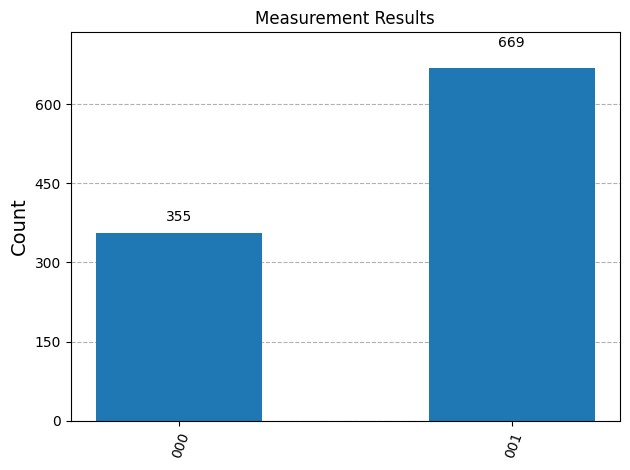

In [8]:
# Import necessary components from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np # For pi
import matplotlib.pyplot as plt # Import Matplotlib for displaying figures

# --- Protocol Parameters (for a single coordinate pair for demonstration) ---
x_i = 5             # Example value for x_i (held by Party A)
y_i = 2             # Example value for y_i (held by Party B)
D_mod = 10          # Modulus D_mod > 2M (where M is max possible |x_i - y_i|)
                    # Ensure D_mod is large enough for your data range.
r_trap_qubits = 2   # Number of trap qubits (as per protocol parameter 'r')
num_coordinates = 1 # We'll demonstrate for n=1 and explain extension

# Define the number of qubits needed:
# 1 data qubit for the phase encoding of (x_i - y_i)
# r_trap_qubits for authentication
num_data_qubits = 1
total_qubits = num_data_qubits + r_trap_qubits
# We need classical bits to store measurement results for the data qubit
# and potentially for verifying trap qubits.
num_classical_bits = num_data_qubits + r_trap_qubits


# --- Step 1: Initialize the Quantum Circuit ---
# Create a quantum circuit with total_qubits and num_classical_bits.
qc = QuantumCircuit(total_qubits, num_classical_bits)
print("Initializing Quantum Circuit (Data Qubit 0, Trap Qubits 1 to {}).".format(r_trap_qubits))
print("-" * 60)

# --- Step 2: Phase Encoding by Party A ---
# Protocol Step: "A: Prepare logical |+> state, apply phase rotation R_z(2*pi*x_i/D_mod)."
data_qubit_idx = 0
qc.h(data_qubit_idx) # Prepare |+> state on the data qubit
print(f"Party A: Applying Hadamard and Rz({2*np.pi*x_i/D_mod:.2f} rad) for x_i={x_i}.")
qc.rz(2 * np.pi * x_i / D_mod, data_qubit_idx)
print("-" * 60)

# --- Step 3: Attach Trap Qubits and Authenticate (Conceptual) ---
# Protocol Step: "A: Attach r trap qubits and authenticate. Send to computation server / TP(s)."
print(f"Party A: Adding {r_trap_qubits} trap qubits and conceptual authentication barrier.")
qc.barrier() # Separates logical blocks in the circuit diagram
for i in range(r_trap_qubits):
    trap_qubit_idx = num_data_qubits + i
    # In a real trap code, these would be prepared in specific known states
    # or entangled for verification.
    # qc.h(trap_qubit_idx) # Example: could apply H for a real trap
print("   (Note: Full trap-based authentication logic is complex and conceptualized here.)")
print("-" * 60)

# --- Step 4: Phase Encoding by Party B ---
# Protocol Step: "B: On receipt, apply R_z(-2*pi*y_i/D_mod) to same logical state."
print(f"Party B: Applying Rz({-2*np.pi*y_i/D_mod:.2f} rad) to Q{data_qubit_idx} for y_i={y_i}.")
qc.rz(-2 * np.pi * y_i / D_mod, data_qubit_idx)
print("-" * 60)

# --- Step 5: Server / TP(s) Perform Modular Subtraction (via Phase) ---
# Protocol Step: "Server / TP(s): Using authenticated states, perform: Modular subtraction..."
print("Server / TP(s): Applying Hadamard to extract Delta_i from phase.")
qc.h(data_qubit_idx)
print("-" * 60)

# --- Step 6: Perform Measurements ---
# Protocol Step: "Parties verify traps; abort if verification fails. Measure S..."
qc.measure(data_qubit_idx, data_qubit_idx)

# Conceptual measurement of trap qubits for verification
for i in range(r_trap_qubits):
    trap_qubit_idx = num_data_qubits + i
    classical_bit_idx_for_trap = num_data_qubits + i
    qc.measure(trap_qubit_idx, classical_bit_idx_for_trap)

print("Applying measurements to Data Qubit and Trap Qubits.")
print("-" * 60)

# --- Display the FULL Quantum Circuit ---
print("\n--- COMPLETE QUANTUM CIRCUIT DIAGRAM ---")
final_fig = qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})
final_fig.savefig('qc_diagram.png', dpi=150)
plt.show(final_fig)
plt.close()
print("-" * 60)


# --- Step 7: Simulate the Circuit ---
# Use a local simulator to run the quantum circuit and get the results.
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(qc)

print("\nMeasurement Results (Counts) for the entire classical register:")
print(counts)
print("-" * 60)

# --- Step 8: Classical Post-Processing (Squaring and Summation) ---
# Protocol Step: "Map Delta_i to canonical range... Square Delta_i reversibly and add to global accumulator S."
# Protocol Step: "Measure S, reconstruct S via classical MPC if multi-TP used. Output D = sqrt(S)."

# In a real scenario, the counts from `data_qubit_idx` would be processed via
# a phase estimation result to get Delta_i. For this simplified demo, we'll
# show the expected classical calculation based on input values.

# Calculate expected Delta_i
delta_i_expected = (x_i - y_i) % D_mod

# Map Delta_i to canonical range [ -floor(D_mod/2), floor(D_mod/2) ]
canonical_range_upper = np.floor(D_mod / 2)
if delta_i_expected > canonical_range_upper:
    delta_i_canonical = delta_i_expected - D_mod
else:
    delta_i_canonical = delta_i_expected

print(f"Classical Post-Processing for x_i={x_i}, y_i={y_i}, D_mod={D_mod}:")
print(f"  Expected Delta_i (x_i - y_i) mod D_mod: {delta_i_expected}")
print(f"  Mapped Delta_i to canonical range: {delta_i_canonical}")

# Square Delta_i
squared_delta_i = delta_i_canonical ** 2
print(f"  Squared Delta_i: {squared_delta_i}")

# Accumulate S (for a single coordinate, S is just squared_delta_i)
S_total = squared_delta_i
print(f"  Accumulated S (for n={num_coordinates} coordinate): {S_total}")

# Calculate Euclidean distance D
D_output = np.sqrt(S_total)
print(f"  Output Euclidean Distance D: {D_output:.4f}")
print("-" * 60)

# --- Step 9: Visualize the Results (Optional) ---
# If running in a Jupyter Notebook or environment that supports plotting:
plot_histogram(counts, title="Measurement Results")


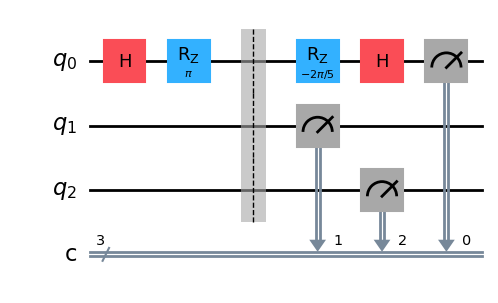

In [9]:
qc.draw(output='mpl', style={'crev_wrap': 80, 'dpi': 150})